In [1]:
#CREAZIONE DATAFRAME CON IL FILE CSV GTRENDS_ESTIMATE
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import collections
from collections import Counter
from nltk.corpus import stopwords
from os import path
from wordcloud import WordCloud
df = pd.read_csv('gtrends_estimates_ok.csv')
df.columns= ['Keyword','Volume']
df.head()
len(df)

117721

In [2]:
#Filtraggio parole non pertinenti alle specifiche del progetto
parole = [] #viene creata una lista in cui si inseriscono le parole(contenute in filtro_parole.txt) da eliminare.
f = open('filtro_parole.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    parole.append(buffer)
f.close()
parole = [parola[:len(parola)-1] for parola in parole] #non viene considerato l'ultimo carattere di tabulazione

In [3]:
#Eliminazione parole presenti nel file "filtro_parole.txt"
for parola in parole:
    df = df[df['Keyword'].str.contains(parola) == False]
len(df)

113858

In [4]:
#CATEGORIA1
#PRIMIPIATTI: creo la lista in cui vado a inserire le parole (contenute in primo.txt) che devo selezionare per la categorizzazione
primi = []
f = open('primow.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    primi.append(buffer)
f.close()
primi = [primo[:len(primo)-1] for primo in primi]
primi

['spaghett',
 'strozzapret',
 'stufat',
 'tagliatell',
 'tagliolin',
 'testarol',
 'tortell',
 'trofi',
 'zuppa',
 'agnol',
 'bigol',
 'brod',
 'bucatin',
 'caccavell',
 'canederl',
 'cannellon',
 'cappell',
 'casoncell',
 'cavatel',
 'dital',
 'fettuccin',
 'frascarell',
 'fusill',
 'garganell',
 'gazpach',
 'gnocc',
 'lasagn',
 'maccar',
 'maccheron',
 'malloredd',
 'maltagliat',
 'manfrigol',
 'marubin',
 'migliatell',
 'minestr',
 'orecchiett',
 'paccher',
 'paell',
 'pappardell',
 'passatell',
 'pasta',
 'penn',
 'pici',
 'pizzoccher',
 'raviol',
 'ribollit',
 'risot',
 'scialat']

In [5]:
#mi salvo nel nuovo dataframe solo i record che contengono parole contenute nella lista appena creata
primoD= pd.DataFrame()
for primo in primi:
    primoD = pd.concat([primoD, df[df['Keyword'].str.contains(primo)]])
    primop = primoD[primoD['Keyword'].str.contains('sfoglia|frolla|fillo|brise|di zucchero') == False]
len(primop)

19253

In [6]:
#eliminazione duplicati
primop= primop.drop_duplicates('Keyword')
len(primop)

18942

In [7]:
#esporto il dataframe in un file csv
primop.to_csv('primop.csv')

In [8]:
#ANTIPASTI: creo la lista in cui vado a inserire le parole (contenute nel file txt) che devo selezionare per la categorizzazione
antipasti = []
f = open('antipastiw.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    antipasti.append(buffer)
f.close()
antipasti = [antipasto[:len(antipasto)-1] for antipasto in antipasti]#per eliminare l'ultimo carattere(tabulazione)

In [9]:
#mi salvo nel nuovo dataframe solo i record che contengono parole contenute nella lista appena creata
antipastiD= pd.DataFrame()
for antipasto in antipasti:
    antipastiD = pd.concat([antipastiD, df[df['Keyword'].str.contains(antipasto)]])
len(antipastiD)

23506

In [10]:
#ELIMINO TUTTE LE PAROLE USATE PER FILTRARE I PRIMI (in primow.txt) DAL DATAFRAME ANTIPASTI 
for primo in primi:
    antipastiD = antipastiD[antipastiD['Keyword'].str.contains(primo) == False]
antifilter = antipastiD[antipastiD['Keyword'].str.contains('cioccolato|senza uova|torta caprese') == False]
len(antifilter)

20292

In [11]:
#Eliminazione duplicati
antipastiD= antipastiD.drop_duplicates('Keyword')
len(antipastiD)

18949

In [12]:
antifilter.to_csv('antipasti2.csv')

In [13]:
#SECONDI: creo la lista in cui vado a inserire le parole (contenute nel file txt) che devo selezionare per la categorizzazione
secondi = []
f = open('secondiw.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    secondi.append(buffer)
f.close()
secondi = [secondo[:len(secondo)-1] for secondo in secondi]#per eliminare l'ultimo carattere(tabulazione)

In [14]:
#mi salvo nel nuovo dataframe solo i record che contengono parole contenute nella lista appena creata
secondiD= pd.DataFrame()
for secondo in secondi:
    secondiD = pd.concat([secondiD, df[df['Keyword'].str.contains(secondo)]])
len(secondiD)

43821

In [15]:
#ELIMINO TUTTE LE PAROLE USATE PER I PRIMI DAL DATAFRAME SECONDI
for primo in primi:
    secondiD = secondiD[secondiD['Keyword'].str.contains(primo) == False]
len(secondiD)

38561

In [16]:
#Eliminazione duplicati
secondiD= secondiD.drop_duplicates('Keyword')
len(secondiD)

31042

In [17]:
secondiD.to_csv('secondi1.csv')

In [18]:
#CONTORNI: creo la lista in cui vado a inserire le parole (contenute nel file txt) che devo selezionare per la categorizzazione
contorni = []
f = open('contorniw.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    contorni.append(buffer)
f.close()
contorni = [contorno[:len(contorno)-1] for contorno in contorni]#per eliminare l'ultimo carattere(tabulazione)

In [19]:
#mi salvo nel nuovo dataframe solo i record che contengono parole contenute nella lista appena creata
contorniD= pd.DataFrame()
for contorno in contorni:
    contorniD = pd.concat([contorniD, df[df['Keyword'].str.contains(contorno)]])
len(contorniD)

33337

In [20]:
#ELIMINO TUTTE LE PAROLE USATE PER IL FILTRAGGIO DEI PRIMI DAL DATAFRAME CONTORNI 
for primo in primi:
    contorniD = contorniD[contorniD['Keyword'].str.contains(primo) == False]
len(contorniD)

28511

In [21]:
#Eliminazione duplicati
contorniD= contorniD.drop_duplicates('Keyword')
len(contorniD)

24362

In [22]:
contorniD.to_csv('contorni.csv')

In [23]:
#DOLCI: creo la lista in cui vado a inserire le parole (contenute nel file txt) che devo selezionare per la categorizzazione
dolci = []
f = open('dolci.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    dolci.append(buffer)
f.close()
dolci = [dolce[:len(dolce)-1] for dolce in dolci]#per eliminare l'ultimo carattere(tabulazione)

In [24]:
#mi salvo nel nuovo dataframe solo i record che contengono parole contenute nella lista appena creata
dolciD= pd.DataFrame()
for dolce in dolci:
    dolciD = pd.concat([dolciD, df[df['Keyword'].str.contains(dolce)]])
len(dolciD)

18691

In [25]:
#eliminazione duplicati
dolciD= dolciD.drop_duplicates('Keyword')
len(dolciD)

15679

In [26]:
dolciD.to_csv('dolci.csv')

In [27]:
contorniD.describe() #DESCRIBE:Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,Volume
count,24362.000000
mean,46.704525
std,843.388050
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,92956.453620


In [28]:
primop.describe()

,Volume
count,18942.000000
mean,55.206488
std,561.042676
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,48103.284694


In [29]:
secondiD.describe()

,Volume
count,31042.000000
mean,45.588999
std,927.456183
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,134515.847120


In [30]:
antifilter.describe()

,Volume
count,20292.000000
mean,29.908264
std,389.642888
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,29891.430883


In [31]:
#Generazione delle trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(primop['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('pasta', 3826),
 ('risotto', 2324),
 ('spaghetti', 1493),
 ('zuppa', 1285),
 ('gnocchi', 872),
 ('zucchine', 761),
 ('tagliatelle', 745),
 ('funghi', 728),
 ('minestra', 723),
 ('lasagne', 715),
 ('zucca', 699),
 ('penne', 667),
 ('ravioli', 618),
 ('pesto', 605),
 ('ricotta', 580),
 ('crema', 567),
 ('patate', 556),
 ('fusilli', 480),
 ('verdure', 442),
 ('carciofi', 435),
 ('asparagi', 411),
 ('salsa', 408),
 ('ragã¹', 396),
 ('salsiccia', 386),
 ('salmone', 383),
 ('sugo', 363),
 ('fagioli', 360),
 ('gnocchetti', 359),
 ('brodo', 354),
 ('tonno', 349)]

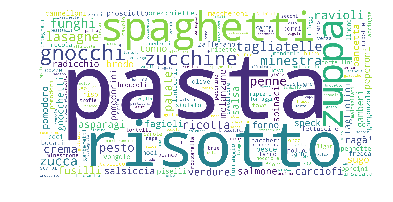

In [32]:
#LE 30 PAROLE PIU FREQUENTi VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). 
d = path.dirname("__file__")
#generazione della wordcloud
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
#Visualizzazione wordcloud e salvataggio del file come immagine
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcprimo.jpg')

In [33]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in primop['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('pasta con', 566),
 ('zuppa di', 450),
 ('risotto con', 335),
 ('minestra di', 249),
 ('spaghetti con', 216),
 ('pasta al', 197),
 ('gnocchi di', 179),
 ('risotto al', 164),
 ('pasta fredda', 150),
 ('spaghetti al', 110),
 ('risotto alla', 110),
 ('pasta alla', 108),
 ('ravioli di', 106),
 ('spaghetti alla', 95),
 ('lasagne con', 95),
 ('pasta e', 94),
 ('risotto ai', 82),
 ('insalata di', 78),
 ('mezze penne', 76),
 ('tagliatelle al', 74),
 ('gnocchi con', 74),
 ('gnocchetti sardi', 69),
 ('tagliatelle con', 68),
 ('spaghetti di', 65),
 ('risotto zucca', 65),
 ('fusilli con', 64),
 ('pasta forno', 63),
 ('lasagne al', 62),
 ('pasta zucchine', 60),
 ('orecchiette con', 60)]

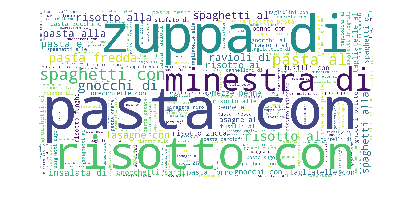

In [34]:
#VISUALIZZO 30 BIGRAMMI PIù FREQUENTI CON WORDCLOUD
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcprimobigram.jpg')#Eporto il file come immagine

In [35]:
#Generazione delle trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(dolciD['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('cioccolato', 3510),
 ('crostata', 1382),
 ('biscotti', 1206),
 ('gelato', 1049),
 ('crema', 983),
 ('torta', 855),
 ('mousse', 808),
 ('muffin', 592),
 ('nutella', 587),
 ('frittelle', 571),
 ('cheesecake', 569),
 ('ricotta', 568),
 ('panna', 479),
 ('fragole', 446),
 ('senza', 445),
 ('tiramisã¹', 440),
 ('cake', 388),
 ('semifreddo', 386),
 ('pere', 377),
 ('bianco', 355),
 ('frutta', 349),
 ('strudel', 349),
 ('sorbetto', 338),
 ('mele', 333),
 ('mandorle', 329),
 ('yogurt', 310),
 ('caffã¨', 296),
 ('gelatina', 296),
 ('arancia', 287),
 ('millefoglie', 284)]

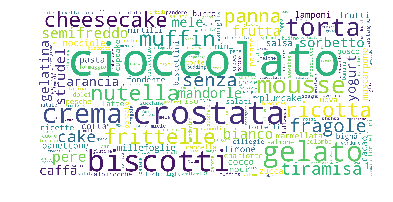

In [36]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole).
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcdolciD.jpg')

In [37]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in dolciD['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('crostata di', 244),
 ('panna cotta', 189),
 ('frittelle di', 179),
 ('mousse di', 156),
 ('crostata con', 145),
 ('torta cioccolato', 120),
 ('torta di', 109),
 ('torta al', 105),
 ('gelato di', 90),
 ('strudel di', 88),
 ('biscotti al', 85),
 ('plum cake', 84),
 ('gelato al', 77),
 ('biscotti di', 77),
 ('ricette torte', 75),
 ('millefoglie di', 72),
 ('sorbetto di', 72),
 ('crostata al', 63),
 ('cheesecake al', 59),
 ('gelato alla', 58),
 ('muffin al', 56),
 ('muffin salati', 56),
 ('pan di', 55),
 ('mousse al', 55),
 ('biscotti con', 54),
 ('crostata crema', 52),
 ('semifreddo di', 51),
 ('crostata alla', 49),
 ('semifreddo al', 48),
 ('gelatina di', 46)]

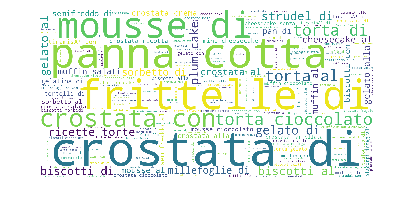

In [38]:
#VISUALIZZO 30 BIGRAMMI PIù FREQUENTI CON WORDCLOUD
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcdolcibigram.jpg')#Eporto il file come immagine

In [39]:
#Generazione delle trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(antifilter['Keyword']).lower().split()).value_counts()
risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('insalata', 3964),
 ('prosciutto', 1946),
 ('uova', 1773),
 ('carciofi', 1586),
 ('involtini', 1409),
 ('peperoni', 1393),
 ('frittata', 922),
 ('patate', 906),
 ('salsiccia', 741),
 ('crostini', 721),
 ('pollo', 669),
 ('riso', 660),
 ('frittelle', 581),
 ('salsa', 548),
 ('zucchine', 530),
 ('crema', 496),
 ('sformato', 487),
 ('formaggio', 481),
 ('carpaccio', 475),
 ('funghi', 401),
 ('ricotta', 389),
 ('fritte', 376),
 ('bruschetta', 363),
 ('salmone', 362),
 ('ripieni', 353),
 ('tonno', 350),
 ('verdure', 345),
 ('fritti', 332),
 ('tartine', 326),
 ('forno', 321)]

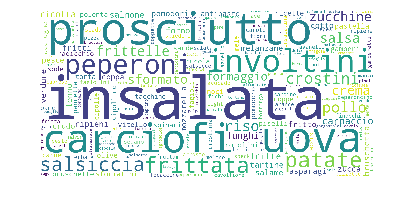

In [40]:
#DATE LE 30 PAROLE PIU FREQUENTi VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole)
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcantipastiD.jpg')

In [41]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in antifilter['Keyword']:
        splitted = row.split()
        if len(splitted) >1: 
            row=splitted[0]
            row2=splitted[1]
            bigrammi.append(row + ' ' + row2)
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('insalata di', 1144),
 ('involtini di', 564),
 ('sformato di', 212),
 ('frittelle di', 185),
 ('frittata di', 158),
 ('carpaccio di', 143),
 ('insalata con', 137),
 ('insalata riso', 116),
 ('bruschetta con', 108),
 ('peperoni ripieni', 107),
 ('crostini con', 104),
 ('rotolini di', 96),
 ('torta salata', 89),
 ('frittata con', 89),
 ('sformatini di', 85),
 ('insalata pollo', 81),
 ('insalata tiepida', 80),
 ('uova strapazzate', 67),
 ('carciofi ripieni', 66),
 ('crostini di', 66),
 ('insalata mista', 65),
 ('involtini pollo', 62),
 ('uova sode', 61),
 ('antipasto di', 58),
 ('involtini prosciutto', 57),
 ('spiedini di', 53),
 ('uova in', 53),
 ('insalata patate', 52),
 ('crema di', 47),
 ('bruschette con', 47)]

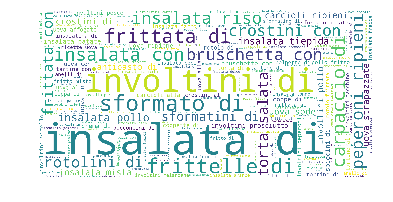

In [42]:
#VISUALIZZO 30 BIGRAMMI PIù FREQUENTI CON WORDCLOUD
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcantipastibigram.jpg')#Eporto il file come immagine

In [43]:
#Generazione delle trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(contorniD['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('insalata', 3546),
 ('patate', 3524),
 ('zucchine', 1979),
 ('prosciutto', 1550),
 ('melanzane', 1328),
 ('carciofi', 1300),
 ('pane', 1097),
 ('panna', 1061),
 ('olive', 974),
 ('crema', 887),
 ('carote', 876),
 ('torta', 737),
 ('riso', 707),
 ('pollo', 706),
 ('pancetta', 693),
 ('forno', 604),
 ('frittelle', 554),
 ('salsa', 544),
 ('rotolo', 482),
 ('pistacchi', 457),
 ('ricotta', 419),
 ('sedano', 418),
 ('cioccolato', 413),
 ('funghi', 407),
 ('salmone', 391),
 ('formaggio', 385),
 ('uova', 376),
 ('involtini', 360),
 ('parmigiano', 333),
 ('tonno', 332)]

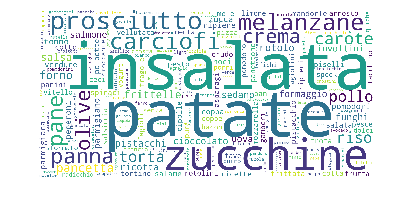

In [44]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole).
d = path.dirname("__file__")
# Generazione della wordcloud
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wccontorniD.jpg')

In [45]:
#Generazione delle trenta parole più frequenti
stop = stopwords.words('italian')
bigrammi=[]
for row in contorniD['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('insalata di', 1046),
 ('torta salata', 194),
 ('panna cotta', 189),
 ('frittelle di', 173),
 ('involtini di', 151),
 ('torta di', 148),
 ('rotolo di', 134),
 ('crema di', 133),
 ('insalata con', 119),
 ('insalata riso', 110),
 ('polpette di', 95),
 ('tortino di', 87),
 ('vellutata di', 81),
 ('pan di', 79),
 ('sformato di', 77),
 ('insalata pollo', 77),
 ('rotolini di', 75),
 ('insalata tiepida', 72),
 ('melanzane ripiene', 62),
 ('zucchine ripiene', 61),
 ('parmigiana di', 60),
 ('crocchette di', 58),
 ('bocconcini di', 55),
 ('patate al', 55),
 ('spiedini di', 54),
 ('insalata mista', 53),
 ('carciofi ripieni', 52),
 ('filetti di', 48),
 ('pane con', 48),
 ('coppe di', 47)]

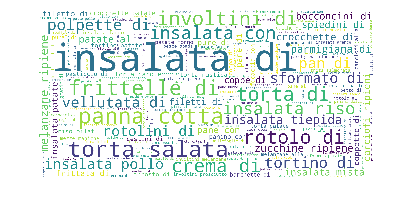

In [46]:
#VISUALIZZO 30 BIGRAMMI PIù FREQUENTI CON WORDCLOUD
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wccontornibigram.jpg')#Eporto il file come immagine

In [47]:
#estraggo le 30 parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(secondiD['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('pollo', 2913),
 ('uova', 1659),
 ('prosciutto', 1550),
 ('patate', 1287),
 ('involtini', 1177),
 ('pesce', 1161),
 ('salsa', 1099),
 ('maiale', 1013),
 ('vitello', 1011),
 ('polpette', 948),
 ('pizza', 907),
 ('insalata', 884),
 ('cipolle', 814),
 ('frittata', 787),
 ('spiedini', 756),
 ('forno', 747),
 ('crema', 738),
 ('tacchino', 730),
 ('carne', 726),
 ('zucchine', 710),
 ('pancetta', 693),
 ('agnello', 678),
 ('funghi', 675),
 ('verdure', 649),
 ('salsiccia', 612),
 ('acciughe', 597),
 ('manzo', 594),
 ('riso', 588),
 ('speck', 583),
 ('ricette', 576)]

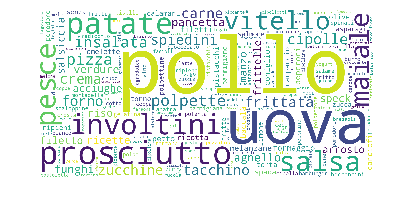

In [48]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole).
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcsecondiD.jpg')

In [49]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in secondiD['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('involtini di', 467),
 ('polpette di', 312),
 ('spiedini di', 273),
 ('insalata di', 249),
 ('filetti di', 217),
 ('frittelle di', 173),
 ('pesce spada', 170),
 ('petto di', 169),
 ('filetto di', 169),
 ('arrosto di', 163),
 ('petto pollo', 147),
 ('torta salata', 142),
 ('frittata di', 137),
 ('bocconcini di', 131),
 ('carpaccio di', 130),
 ('pizza con', 110),
 ('peperoni ripieni', 97),
 ('spezzatino di', 95),
 ('pollo al', 95),
 ('crema di', 87),
 ('calamari ripieni', 81),
 ('polpettine di', 80),
 ('insalata pollo', 77),
 ('frittata con', 76),
 ('pollo con', 73),
 ('rotolo di', 73),
 ('tartare di', 69),
 ('omelette con', 67),
 ('melanzane ripiene', 62),
 ('pollo alla', 62)]

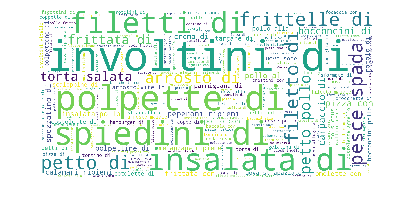

In [50]:
#VISUALIZZO 30 BIGRAMMI PIù FREQUENTI CON WORDCLOUD
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcsecondibigram.jpg')#Eporto il file come immagine

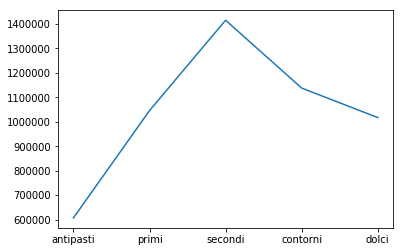

In [51]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#SOMMA
portate=['antipasti','primi','secondi','contorni','dolci']
volumi=[ sum(antifilter['Volume']),sum(primop['Volume']), sum(secondiD['Volume']), sum(contorniD['Volume']), sum(dolciD['Volume']) ]
plt.plot(portate,volumi)
plt.savefig('portatesum.png')

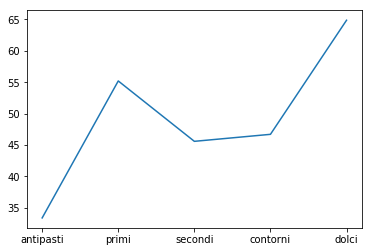

In [52]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#MEDIA
portate=['antipasti','primi','secondi', 'contorni','dolci']
volumi=[(antipastiD['Volume'].mean()), (primop['Volume'].mean()), (secondiD['Volume'].mean()), (contorniD['Volume'].mean()),(dolciD['Volume'].mean())]
plt.plot(portate,volumi)
plt.savefig('portatemean.png')

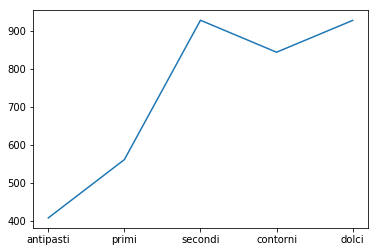

In [53]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#STANDARD DEVIATION
portate=['antipasti','primi','secondi', 'contorni', 'dolci']
volumi=[(antipastiD['Volume'].std()), (primop['Volume'].std()), (secondiD['Volume'].std()), (contorniD['Volume'].std()), (dolciD['Volume'].std())]
plt.plot(portate,volumi)
plt.savefig('portatestd.png')

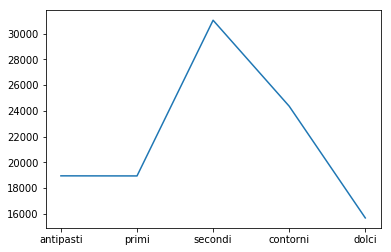

In [54]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#COUNT (numero di record per ogni sottocategoria)
portate=['antipasti','primi','secondi', 'contorni','dolci']
volumi=[(antipastiD['Volume'].count()), (primop['Volume'].count()), (secondiD['Volume'].count()), (contorniD['Volume'].count()),(dolciD['Volume'].count())]
plt.plot(portate,volumi)
plt.savefig('portatecount.png')

In [55]:
#CATEGORIA 2:INTOLLERANZE/ABITUDINI ALIMENTARI
#VEGETARIANI/VEGANI
veg = []
f = open('veg.txt')
while True:
    buffer = f.readline()
    if buffer == "":
        break
    veg.append(buffer)
f.close()
veg = [v[:len(v)-1] for v in veg]
veg

['Allo gobi',
 'Amazake',
 'Baba ',
 'ganush',
 'Bacon vegetale',
 'Bulgur',
 'Burro di arachidi',
 'Caponata',
 'Caprese ',
 'Carragenina',
 'Crudismo',
 'vegan',
 'veg',
 'vegetar',
 'Cuscus',
 'Falafel',
 'Focaccia genovese',
 'Fruttarismo',
 'Gado-gado',
 'Gazpacho',
 'Giardiniera',
 'Guacamole',
 'Halva',
 'Harissa',
 'Hummus',
 'Imam bayildi',
 'Insalata',
 'Insalata di patate',
 'Insalata israeliana',
 'Insalata turca',
 'Labaneh',
 'Latte di canapa',
 'Latte di cocco',
 'Latte di riso',
 'Latte di soia',
 'Latte vegetale',
 'Lupinus albus',
 'Malto',
 'Matbucha',
 'Mejadra',
 'Natto',
 'Pakora',
 'Pane esseno',
 'Pescetar',
 'Pesto',
 'Pistou',
 'Puri',
 'Chenopodium quinoa',
 'Ratatouille',
 'Seitan',
 'Shakshuka',
 'Skhug',
 'Tabbouleh',
 'Tahina',
 'Tamari',
 'Tempeh',
 'Tofu',
 'Hamburger vegetariano',
 'Yuba',
 'Zuppa di miso',
 'senza uova',
 'senza burro',
 'senza yogurt ',
 'senza latt',
 'senza formag',
 'latte di soia',
 'latte di mandorla',
 'latte di riso',
 'latte 

In [56]:
vegD= pd.DataFrame()
for v in veg:
    vegD = pd.concat([vegD, df[df['Keyword'].str.contains(v)]])
len(vegD)

1694

In [57]:
#Eliminazione duplicati
vegD= vegD.drop_duplicates('Keyword')
len(vegD)

1104

In [58]:
vegD.to_csv('veg.csv')

In [59]:
#estraggo le trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(vegD['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('senza', 417),
 ('uova', 208),
 ('burro', 139),
 ('vegan', 124),
 ('torta', 119),
 ('latte', 106),
 ('cioccolato', 104),
 ('vegana', 90),
 ('vegetariano', 71),
 ('vegetariane', 68),
 ('biscotti', 59),
 ('vegetariana', 58),
 ('vegetariani', 52),
 ('ricette', 50),
 ('vegetale', 44),
 ('vegano', 43),
 ('pasta', 41),
 ('cocco', 39),
 ('vegani', 36),
 ('crema', 35),
 ('lattosio', 32),
 ('muffin', 30),
 ('riso', 29),
 ('polpette', 28),
 ('insalata', 27),
 ('patate', 27),
 ('crostata', 25),
 ('tiramisã¹', 25),
 ('ragã¹', 24),
 ('zucchine', 24)]

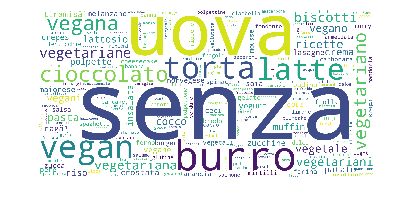

In [60]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole).
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcvegan.jpg')

In [61]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in vegD['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('ricette vegetariane', 21),
 ('torta vegana', 15),
 ('torta di', 14),
 ('lasagne vegetariane', 13),
 ('biscotti al', 11),
 ('tiramisÃ¹ senza', 11),
 ('torta al', 10),
 ('biscotti vegani', 9),
 ('crepes vegan', 9),
 ('insalata di', 9),
 ('pasta frolla', 8),
 ('cous cous', 8),
 ('crostata vegana', 7),
 ('muffin vegani', 7),
 ('muffin senza', 7),
 ('plum cake', 6),
 ('biscotti senza', 6),
 ('torta cioccolato', 6),
 ('cheesecake senza', 6),
 ('torta mele', 5),
 ('crostata vegan', 5),
 ('crema di', 5),
 ('melanzane ripiene', 5),
 ('pasta al', 5),
 ('torta all', 5),
 ('brodo vegetale', 5),
 ('polpette vegetariane', 5),
 ('polpettone vegetariano', 5),
 ('risotto vegetariano', 5),
 ('vellutata di', 5)]

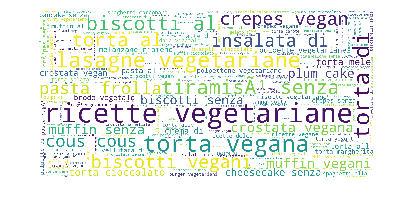

In [62]:
#Visualizzazione dei trenta bigrammi più frequenti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcvegbigrammi.jpg')#Eporto il file come immagine

In [63]:
#CELIACHIA
celiaci = df[df['Keyword'].str.contains('glutine|gluten|celiac|teff|senza farina|senza cere|farina di mais|farina di miglio|farina di sorgo|farina di riso|farina di amaranto|grano saraceno|farina di quinoa|farina di ceci|farina di segale')]
celiacifil = celiaci[celiaci['Keyword'].str.contains('bulgur') == False]
len(celiacifil)

619

In [64]:
celiacifil.to_csv('celiac.csv')

In [65]:
#generazione trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(celiacifil['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('senza', 289),
 ('glutine', 265),
 ('grano', 219),
 ('saraceno', 218),
 ('farina', 116),
 ('torta', 77),
 ('riso', 45),
 ('ceci', 44),
 ('cioccolato', 32),
 ('biscotti', 26),
 ('crema', 23),
 ('mele', 20),
 ('ricette', 20),
 ('pizza', 20),
 ('lasagne', 19),
 ('noci', 18),
 ('patate', 18),
 ('gluten', 17),
 ('pasta', 17),
 ('crepes', 17),
 ('free', 17),
 ('celiaci', 16),
 ('pane', 15),
 ('mais', 14),
 ('muffin', 13),
 ('zucca', 13),
 ('crostata', 13),
 ('salsa', 12),
 ('mandorle', 12),
 ('yogurt', 11)]

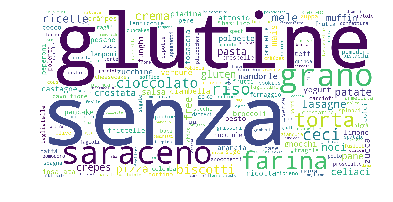

In [66]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). 
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcceliac.jpg')

In [67]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in celiacifil['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('torta di', 17),
 ('lasagne senza', 10),
 ('pizza senza', 9),
 ('grano saraceno', 7),
 ('torta con', 7),
 ('torta senza', 6),
 ('torta grano', 6),
 ('muffin senza', 6),
 ('torta al', 6),
 ('ricette dolci', 6),
 ('crepes con', 6),
 ('crostata senza', 5),
 ('polpette di', 5),
 ('biscotti con', 4),
 ('torta cioccolato', 4),
 ('pancake senza', 4),
 ('pizza con', 4),
 ('ricette torte', 4),
 ('gnocchi di', 4),
 ('fagottini di', 4),
 ('omelette con', 4),
 ('pasta senza', 4),
 ('pane senza', 3),
 ('biscotti grano', 3),
 ('ricette con', 3),
 ('torta mele', 3),
 ('pasta frolla', 3),
 ('pan di', 3),
 ('cheesecake senza', 3),
 ('biscotti di', 3)]

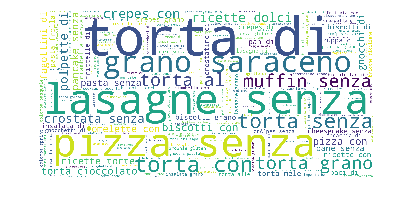

In [68]:
#visualizzazione trenta bigrammi più frequenti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcceliacbigramm.jpg')#Eporto il file come immagine

In [69]:
#LATTICINI
latticini = df[df['Keyword'].str.contains('latticin|lattos|senza yogurt|senza formaggio|senza burro|senza latt|latte di soia|latte di mandorle|latte di cocco|latte di riso|yogurt di soia')]
len(latticini)

286

In [70]:
latticini.to_csv('lattosio.csv')

In [71]:
#generazione trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(latticini['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('senza', 243),
 ('burro', 124),
 ('latte', 108),
 ('torta', 56),
 ('lattosio', 40),
 ('cocco', 37),
 ('cioccolato', 35),
 ('uova', 34),
 ('biscotti', 24),
 ('muffin', 17),
 ('soia', 17),
 ('mandorle', 14),
 ('yogurt', 12),
 ('glutine', 12),
 ('pere', 11),
 ('ricette', 10),
 ('latticini', 10),
 ('gelato', 10),
 ('dolci', 9),
 ('pollo', 8),
 ('crepes', 8),
 ('cacao', 8),
 ('mele', 8),
 ('crema', 7),
 ('cheesecake', 7),
 ('ciambella', 7),
 ('olio', 6),
 ('limone', 6),
 ('pancake', 6),
 ('intolleranti', 6)]

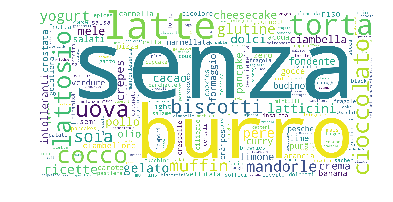

In [72]:
#DATE LE 30 PAROLE PIU FREQUENTi VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). 
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wclattic.jpg')

In [73]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in latticini['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('torta di', 9),
 ('latte di', 7),
 ('muffin senza', 6),
 ('torta al', 6),
 ('biscotti senza', 5),
 ('ricette dolci', 5),
 ('biscotti al', 5),
 ('cheesecake senza', 5),
 ('crepes senza', 4),
 ('pancake senza', 4),
 ('pollo al', 4),
 ('torta con', 4),
 ('crÃªpes senza', 4),
 ('torta mele', 3),
 ('torta cioccolato', 3),
 ('besciamella senza', 3),
 ('torta pere', 3),
 ('muffin al', 3),
 ('cookies senza', 3),
 ('torta all', 3),
 ('crepes con', 3),
 ('vellutata di', 3),
 ('torta senza', 2),
 ('ciambellone senza', 2),
 ('plumcake senza', 2),
 ('biscotti cioccolato', 2),
 ('torta margherita', 2),
 ('muffin cioccolato', 2),
 ('torta carote', 2),
 ('crostata marmellata', 2)]

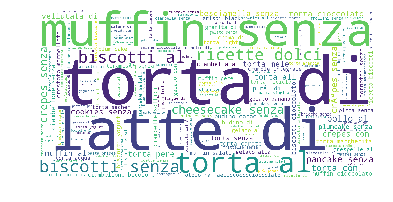

In [74]:
#Visualizzaione 30 bigrammi
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wclatticinbigra.jpg')#Eporto il file come immagine

In [75]:
#CATEGORIA 3:STAGIONALITA/FESTIVITA
#ESTATE
estate = df[df['Keyword'].str.contains('\sestiv|estat|giugno|luglio|agosto')]
estate.to_csv('estate.csv')
vol_max_est=estate.nlargest(1, 'Volume')
len(estate)

289

In [76]:
estate.to_csv('estate.csv')

In [77]:
estate.describe()

,Volume
count,289.000000
mean,21.204759
std,144.114223
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2213.604191


In [78]:
#generazione trenta parole più frequenti
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(estate['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('estiva', 112),
 ('estate', 59),
 ('insalata', 52),
 ('estive', 45),
 ('verdure', 42),
 ('estivo', 41),
 ('d', 25),
 ('frutta', 22),
 ('estivi', 20),
 ('pasta', 17),
 ('peperoni', 15),
 ('fagioli', 11),
 ('torta', 11),
 ('ricette', 11),
 ('riso', 8),
 ('cous', 7),
 ('crostata', 6),
 ('grana', 6),
 ('mezza', 6),
 ('orzo', 6),
 ('farro', 6),
 ('sapore', 6),
 ('zucchine', 6),
 ('pesche', 6),
 ('tiramisã¹', 5),
 ('risotto', 5),
 ('crema', 5),
 ('minestrone', 5),
 ('mousse', 5),
 ('crostini', 5)]

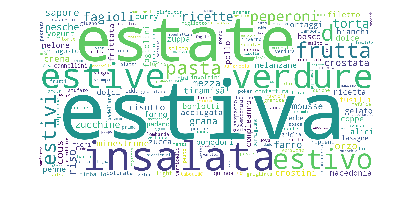

In [79]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole).
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcesitv.jpg')

In [80]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI
stop = stopwords.words('italian')
bigrammi=[]
for row in estate['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('insalata estiva', 17),
 ('insalata di', 11),
 ('tiramisÃ¹ estivo', 5),
 ('crostata estiva', 4),
 ('verdure estive', 4),
 ('ricette estive', 3),
 ('pasta estiva', 3),
 ('dolci estivi', 3),
 ('torta di', 3),
 ('minestrone estivo', 3),
 ('crostini estivi', 3),
 ('crema estiva', 3),
 ('insalata colorata', 3),
 ('insalata d', 3),
 ('mousse estiva', 3),
 ('peperoni ripieni', 3),
 ('ricette secondi', 2),
 ('torta estiva', 2),
 ('macedonia estiva', 2),
 ('pasta al', 2),
 ('budino estivo', 2),
 ('composta estiva', 2),
 ('coppe di', 2),
 ('crespelle estive', 2),
 ('crumb cake', 2),
 ('dado granulare', 2),
 ('finto supplÃ¬', 2),
 ('fresco dolce', 2),
 ('gelato estivo', 2),
 ('grasso pestato', 2)]

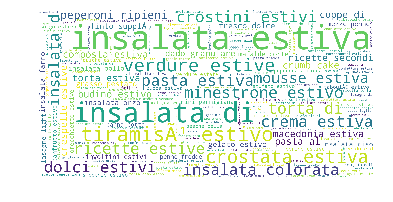

In [81]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcestivbigram.jpg')#Eporto il file come immagine

In [82]:
#INVERNO
inverno = df[df['Keyword'].str.contains('invern|dicembre|gennaio|febbraio')]
inverno.to_csv('inverno.csv')
len(inverno)

117

In [83]:
inverno.to_csv('inverno.csv')

In [84]:
inverno.describe()

,Volume
count,117.000000
mean,3.671898
std,16.385873
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,108.628337


In [85]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(inverno['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('invernale', 44),
 ('inverno', 36),
 ('invernali', 35),
 ('verdure', 32),
 ('insalata', 22),
 ('d', 16),
 ('zuppa', 11),
 ('minestra', 7),
 ('ricette', 5),
 ('orzo', 4),
 ('noci', 4),
 ('lasagne', 4),
 ('forno', 4),
 ('ortaggi', 4),
 ('zucca', 4),
 ('salmone', 4),
 ('gorgonzola', 4),
 ('vegetariane', 3),
 ('minestrone', 3),
 ('melone', 3),
 ('parmigiana', 2),
 ('pinzimonio', 2),
 ('light', 2),
 ('crostatine', 2),
 ('gratin', 2),
 ('tagliatelle', 2),
 ('pomodoro', 2),
 ('uvetta', 2),
 ('spaghetti', 2),
 ('riso', 2)]

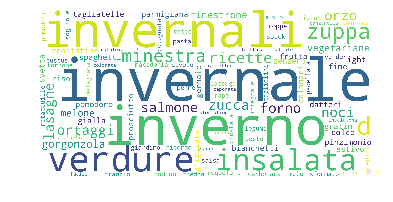

In [86]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). 
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcinverno.jpg')

In [87]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in inverno['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('insalata invernale', 9),
 ('minestra invernale', 7),
 ('zuppa invernale', 5),
 ('insalata di', 3),
 ('verdure invernali', 2),
 ('ricette light', 2),
 ('budino estivo', 2),
 ('calamari ripieni', 2),
 ('coppe invernali', 2),
 ('crostatine invernali', 2),
 ('insalata fredda', 2),
 ('lasagne vegetariane', 2),
 ('spaghetti invernali', 2),
 ('torrone giardino', 2),
 ('zuppa di', 2),
 ('zuppa verdure', 2),
 ('antipasti invernali', 1),
 ('zuppe invernali', 1),
 ('ricette vegetariane', 1),
 ('spiedini di', 1),
 ('ricette invernali', 1),
 ('panzanella invernale', 1),
 ('caponata invernale', 1),
 ('ciambellone invernale', 1),
 ('cotognata d', 1),
 ('cotognata inverno', 1),
 ('crostata d', 1),
 ('crostata inverno', 1),
 ('cuscus con', 1),
 ('cuscus verdure', 1)]

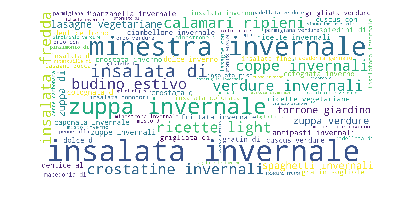

In [88]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcinvernbigram.jpg')#Eporto il file come immagine

In [89]:
#PRIMAVERA
primavera = df[df['Keyword'].str.contains('primaver|marzo|aprile|\smaggio\s')]
primavera.to_csv('primavera.csv')
vol_max_prim=primavera.nlargest(1, 'Volume')
len(primavera)

170

In [90]:
primavera= primavera.drop_duplicates('Keyword')
len(primavera)

170

In [91]:
primavera.to_csv('primavera.csv')

In [92]:
primavera.describe()

,Volume
count,170.000000
mean,9.671286
std,65.413754
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,793.191783


In [93]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(primavera['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('primavera', 130),
 ('verdure', 32),
 ('insalata', 21),
 ('primaverili', 17),
 ('primaverile', 16),
 ('torta', 9),
 ('marzolino', 8),
 ('involtini', 8),
 ('risotto', 7),
 ('salsa', 6),
 ('ortaggi', 6),
 ('minestra', 6),
 ('riso', 6),
 ('pasta', 5),
 ('zuppa', 5),
 ('uova', 5),
 ('sfoglie', 4),
 ('croccanti', 4),
 ('spaghetti', 4),
 ('pilaf', 4),
 ('lasagne', 4),
 ('pesto', 4),
 ('basmati', 4),
 ('piselli', 4),
 ('cous', 4),
 ('erbe', 4),
 ('farro', 4),
 ('agnello', 4),
 ('ratatouille', 4),
 ('antipasto', 3)]

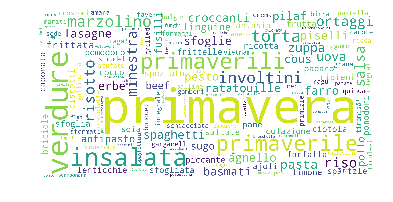

In [94]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). esempio con primi piatti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcprimav.jpg')

In [95]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in primavera['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('involtini primavera', 8),
 ('insalata primaverile', 8),
 ('insalata primavera', 5),
 ('torta primavera', 3),
 ('lasagne primavera', 3),
 ('insalata di', 3),
 ('risotto primavera', 2),
 ('zuppa primavera', 2),
 ('cous cous', 2),
 ('grilled beef', 2),
 ('insalata pomodori', 2),
 ('linguine integrali', 2),
 ('minestra ricca', 2),
 ('pasta primaverile', 2),
 ('ratatouille di', 2),
 ('ratatouille primavera', 2),
 ('riso basmati', 2),
 ('risotto di', 2),
 ('schiacciata integrale', 2),
 ('spÃ¤tzle tirolesi', 2),
 ('torta di', 2),
 ('verdure primaverili', 2),
 ('zuppa amara', 2),
 ('pasta primavera', 1),
 ('pizza primavera', 1),
 ('uova primavera', 1),
 ('tagliatelle primavera', 1),
 ('bouquet primavera', 1),
 ('rotolo primavera', 1),
 ('pennette primavera', 1)]

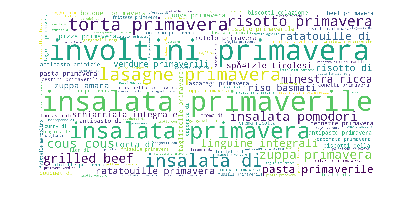

In [96]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcprimavbigram.jpg')#Eporto il file come immagine

In [97]:
#AUTUNNO
autunno = df[df['Keyword'].str.contains('autunn|settembre|ottobre|novembre')]
autunno.to_csv('autunno.csv')
vol_max_aut=autunno.nlargest(1, 'Volume')
len(autunno)

79

In [98]:
autunno.to_csv('autunno.csv')

In [99]:
autunno.describe()

,Volume
count,79.000000
mean,5.784884
std,27.174614
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,206.996989


In [100]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(autunno['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('autunno', 36),
 ('autunnale', 21),
 ('d', 16),
 ('autunnali', 12),
 ('insalata', 8),
 ('verdure', 8),
 ('macedonia', 5),
 ('settembre', 5),
 ('crostata', 4),
 ('zuppa', 3),
 ('porcini', 2),
 ('cornucopia', 2),
 ('novembre', 2),
 ('risotto', 2),
 ('tacchino', 2),
 ('melagrana', 2),
 ('secca', 2),
 ('sinfonia', 2),
 ('biscotti', 2),
 ('salsa', 2),
 ('contorno', 2),
 ('arrosto', 2),
 ('ottobre', 2),
 ('ricetta', 2),
 ('pere', 2),
 ('torta', 2),
 ('carne', 2),
 ('ravioli', 2),
 ('gnocchi', 2),
 ('vitello', 2)]

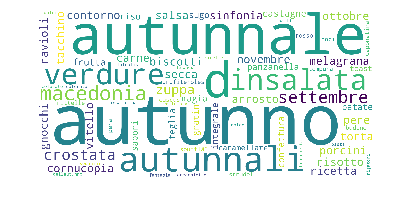

In [101]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). esempio con primi piatti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcautun.jpg')

In [102]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in autunno['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('insalata autunnale', 3),
 ('cuscus autunnale', 2),
 ('macedonia di', 2),
 ('risotto integrale', 2),
 ('strudel autunnale', 2),
 ('torta magia', 2),
 ('ricette autunnali', 1),
 ('dolce autunno', 1),
 ('pasta autunnale', 1),
 ('zuppa autunnale', 1),
 ('lasagna autunnale', 1),
 ('crostata autunnale', 1),
 ('macedonia autunnale', 1),
 ('dolci autunnali', 1),
 ('arrosto autunno', 1),
 ('arrosto d', 1),
 ('biscotti autunno', 1),
 ('biscotti d', 1),
 ('bruschetta autunnale', 1),
 ('budino di', 1),
 ('budino settembre', 1),
 ('clafoutis autunnale', 1),
 ('confettura autunno', 1),
 ('confettura d', 1),
 ('contorno di', 1),
 ('contorno novembre', 1),
 ('cornucopia autunno', 1),
 ('cornucopia d', 1),
 ('crostata autunno', 1),
 ('crostata d', 1)]

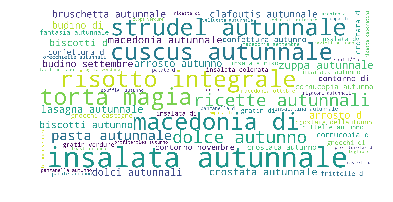

In [103]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcautunbigram.jpg')#Eporto il file come immagine

In [180]:
#NATALE
natale = df[df['Keyword'].str.contains('natal|pandor|panetton')]
#natale = natale[natale['Keyword'].str.contains('^natale$')== False]
natale.to_csv('natale.csv')
len(natale)

718

In [181]:
natale= natale.drop_duplicates('Keyword')
len(natale)
natale.head()

,Keyword,Volume
1,natale,235648.204735
79,panettone,12180.644457
140,pandoro,6905.829186
348,stella natale,3043.921674
390,stella di natale,2775.657740


In [182]:
natale.to_csv('natale.csv')

In [107]:
natale.describe()

,Volume
count,717.000000
mean,91.601619
std,588.205915
min,0.000000
25%,0.000000
50%,0.000000
75%,8.449210
max,12180.644457


In [108]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(natale['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('natale', 280),
 ('panettone', 250),
 ('pandoro', 127),
 ('cioccolato', 54),
 ('biscotti', 46),
 ('crema', 44),
 ('torta', 28),
 ('albero', 27),
 ('farcito', 25),
 ('gastronomico', 24),
 ('panna', 19),
 ('dolce', 18),
 ('ricette', 17),
 ('babbo', 17),
 ('nutella', 16),
 ('pasta', 15),
 ('panettoncini', 15),
 ('zuccotto', 15),
 ('tiramisã¹', 14),
 ('frutta', 14),
 ('dolci', 14),
 ('ricotta', 14),
 ('ripieno', 13),
 ('stella', 13),
 ('mascarpone', 12),
 ('arancia', 12),
 ('stelle', 12),
 ('cupcake', 11),
 ('natalizi', 11),
 ('salato', 11)]

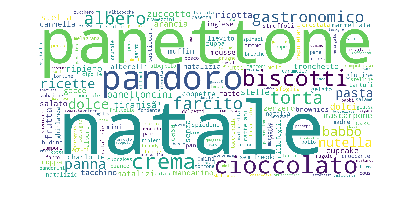

In [109]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). esempio con primi piatti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcnatale.jpg')

In [110]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in natale['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('panettone gastronomico', 24),
 ('panettone farcito', 15),
 ('biscotti di', 14),
 ('biscotti natale', 12),
 ('panettone con', 11),
 ('pandoro farcito', 9),
 ('torta di', 8),
 ('panettone salato', 8),
 ('babbo natale', 6),
 ('panettone di', 6),
 ('tronchetto natale', 5),
 ('tronchetto di', 5),
 ('albero di', 5),
 ('panettone per', 5),
 ('zuppa inglese', 5),
 ('albero natale', 4),
 ('panettone fatto', 4),
 ('zuccotto di', 4),
 ('ricette dolci', 4),
 ('panettone senza', 4),
 ('charlotte di', 4),
 ('tiramisÃ¹ di', 4),
 ('pollo ripieno', 4),
 ('pain perdu', 4),
 ('panettoncini ripieni', 4),
 ('alberelli di', 3),
 ('torta panettone', 3),
 ('torta pandoro', 3),
 ('charlotte pandoro', 3),
 ('panettone ripieno', 3)]

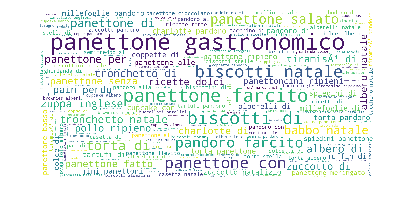

In [111]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcnatalebigram.jpg')#Eporto il file come immagine

In [112]:
#PASQUA
pasqua = df[df['Keyword'].str.contains('pasq|uova di cioccolato')]
pasqua.to_csv('pasqua.csv')
len(pasqua)

294

In [113]:
pasqua= pasqua.drop_duplicates('Keyword')
len(pasqua)

294

In [114]:
pasqua.to_csv('pasqua.csv')

In [115]:
pasqua.describe()

,Volume
count,294.000000
mean,70.306281
std,409.942847
min,0.000000
25%,0.000000
50%,0.000000
75%,8.341947
max,4986.877418


In [116]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(pasqua['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('pasqua', 173),
 ('pasquale', 61),
 ('uova', 43),
 ('torta', 36),
 ('colomba', 36),
 ('cioccolato', 28),
 ('pasqualina', 24),
 ('ricette', 17),
 ('pizza', 13),
 ('biscotti', 12),
 ('pasquali', 12),
 ('dolce', 10),
 ('pasqualine', 10),
 ('fondente', 8),
 ('veloce', 8),
 ('pasquetta', 8),
 ('pane', 8),
 ('ciambelline', 7),
 ('riso', 6),
 ('treccia', 6),
 ('pasta', 6),
 ('salata', 6),
 ('crostata', 6),
 ('frittata', 6),
 ('brioche', 5),
 ('minestra', 5),
 ('tiramisã¹', 5),
 ('avanzi', 4),
 ('mini', 4),
 ('carciofi', 4)]

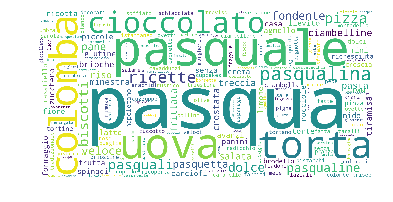

In [117]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcpasqua.jpg')

In [118]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in pasqua['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('torta pasqualina', 18),
 ('uova di', 17),
 ('colomba pasquale', 13),
 ('uova pasqua', 12),
 ('colomba di', 8),
 ('colomba pasqua', 7),
 ('torta pasquale', 7),
 ('pizza pasqua', 5),
 ('pizza di', 5),
 ('biscotti pasqua', 5),
 ('biscotti di', 5),
 ('treccia pasquale', 4),
 ('crostata pasquale', 4),
 ('ricette per', 3),
 ('ricette dolci', 3),
 ('pane pasqua', 3),
 ('pane di', 3),
 ('torta salata', 3),
 ('ciambella pasquale', 3),
 ('frittata di', 3),
 ('pinza pasquale', 3),
 ('ciambelline pasquali', 3),
 ('pane pasquale', 2),
 ('torta pasqua', 2),
 ('torta di', 2),
 ('ricette veloci', 2),
 ('ciambellone nido', 2),
 ('biscotti uova', 2),
 ('caramelle pasqualine', 2),
 ('casatiello napoletano', 2)]

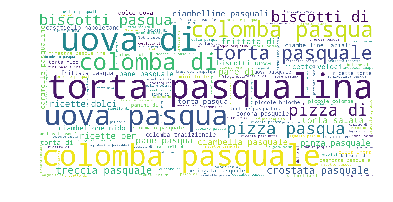

In [119]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcpasquabigram.jpg')#Eporto il file come immagine

In [120]:
#CAPODANNO
capodanno = df[df['Keyword'].str.contains('capodann')]
capodanno.to_csv('capodanno.csv')
len(capodanno)

20

In [121]:
capodanno= capodanno.drop_duplicates('Keyword')
len(capodanno)

20

In [122]:
capodanno.to_csv('capodanno.csv')

In [123]:
capodanno.describe()

,Volume
count,20.000000
mean,110.379172
std,216.740509
min,0.000000
25%,0.000000
50%,0.000000
75%,102.604607
max,732.137343


In [124]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(capodanno['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('capodanno', 20),
 ('antipasti', 3),
 ('ricette', 3),
 ('secondi', 3),
 ('cannelloni', 2),
 ('cenone', 2),
 ('zuppa', 2),
 ('originale', 2),
 ('ricetta', 2),
 ('panzanella', 2),
 ('pesce', 2),
 ('crosta', 2),
 ('lenticchie', 2),
 ('panzerotti', 2),
 ('cotechino', 2),
 ('zampone', 2),
 ('economici', 1),
 ('piatti', 1)]

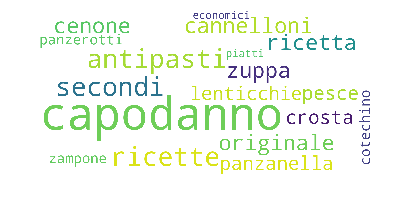

In [125]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). esempio con primi piatti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wccapodan.jpg')

In [126]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in capodanno['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('antipasti capodanno', 1),
 ('ricette capodanno', 1),
 ('ricette per', 1),
 ('antipasti di', 1),
 ('secondi capodanno', 1),
 ('secondi di', 1),
 ('ricette antipasti', 1),
 ('cannelloni capodanno', 1),
 ('cannelloni per', 1),
 ('cotechino crosta', 1),
 ('cotechino in', 1),
 ('panzanella di', 1),
 ('panzanella lenticchie', 1),
 ('panzerotti capodanno', 1),
 ('panzerotti di', 1),
 ('secondi piatti', 1),
 ('zampone capodanno', 1),
 ('zampone di', 1),
 ('zuppa di', 1),
 ('zuppa pesce', 1)]

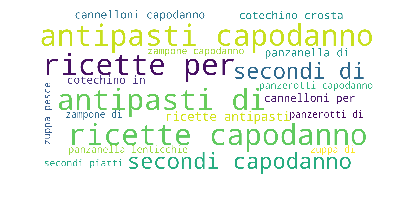

In [127]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wccapodbigram.jpg')#Eporto il file come immagine

In [128]:
#FESTE: COMPLEANNI, LAUREE, MATRIMONI E FESTE IN GENERALE
feste = df[df['Keyword'].str.contains('compleann|augur|fest|laure|matrimon')]
feste.to_csv('feste.csv')
len(feste)

107

In [129]:
feste.to_csv('feste.csv')

In [130]:
feste.describe()

,Volume
count,107.000000
mean,228.590579
std,1102.254832
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7850.912693


In [131]:
stop_words = stopwords.words('italian')
parole_freq = pd.Series(' '.join(feste['Keyword']).lower().split()).value_counts()

risultato = []
for riga in parole_freq.index:
    if (riga not in stop_words):
        risultato.append((riga, parole_freq[riga]))
risultato[:30]

[('torta', 45),
 ('compleanno', 43),
 ('feste', 24),
 ('festa', 8),
 ('auguri', 8),
 ('zucchero', 6),
 ('cupcake', 6),
 ('torte', 6),
 ('ricette', 5),
 ('crema', 4),
 ('cioccolato', 4),
 ('estiva', 4),
 ('pasta', 4),
 ('dolce', 4),
 ('mamma', 4),
 ('dolci', 4),
 ('matrimonio', 3),
 ('bambini', 3),
 ('omelette', 3),
 ('oktober', 3),
 ('insalata', 3),
 ('fest', 3),
 ('golosi', 2),
 ('augurio', 2),
 ('ananas', 2),
 ('lamponi', 2),
 ('spiderman', 2),
 ('laura', 2),
 ('tortine', 2),
 ('indiane', 2)]

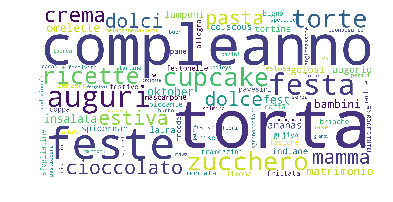

In [132]:
#DATE LE 30 PAROLE PIU FREQUENTi  VENGONO VISUALIZZATE CON LA WORDCLOUD (nuvola di parole). esempio con primi piatti
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(risultato))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcfeste.jpg')

In [133]:
#ESTRAGGO I TRENTA BIGRAMMI PIù FREQUENTI(esempio su primipiatti)
stop = stopwords.words('italian')
bigrammi=[]
for row in feste['Keyword']:
     splitted = row.split()
     if len(splitted) >1: 
        row=splitted[0]
        row2=splitted[1]
        bigrammi.append(row + ' ' + row2)           
count = Counter()
for row in bigrammi:
    count[row] += 1
count.most_common(30)

[('torta di', 17),
 ('torta compleanno', 14),
 ('ricette torte', 3),
 ('torta estiva', 2),
 ('biscottini golosi', 2),
 ('brioche salata', 2),
 ('dolci festa', 2),
 ('festonelle fredde', 2),
 ('mawa gujiya', 2),
 ('omelette all', 2),
 ('pane festivo', 2),
 ('torta festosa', 2),
 ('torte compleanno', 1),
 ('torte di', 1),
 ('dolce compleanno', 1),
 ('torta del', 1),
 ('dolce di', 1),
 ('ricette per', 1),
 ('base per', 1),
 ('torta delle', 1),
 ('panini delle', 1),
 ('auguri da', 1),
 ('auguri fragolosi', 1),
 ('auguri sgranocchiare', 1),
 ('base torta', 1),
 ('bignÃ¨ delle', 1),
 ('bignÃ¨ feste', 1),
 ('coppa delle', 1),
 ('coppa feste', 1),
 ('couscous delle', 1)]

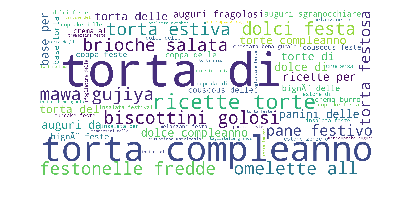

In [134]:
d = path.dirname("__file__")
wordcloud = WordCloud(background_color='white', width=2000, height=1000).generate_from_frequencies(dict(count))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wcfestebigram.jpg')#Eporto il file come immagine

In [135]:
#Creazione di un unico file csv per la categoria stagioni
file_unico_per_stagioni = [estate, inverno, primavera, autunno]
result = pd.concat(file_unico_per_stagioni)
result.to_csv("file_unico_per_stagioni.csv")
stagioni = pd.read_csv('file_unico_per_stagioni.csv')
stagioni.columns= [' ','Keyword','Volume']
stagioni.head()
stagioni.describe()

,,Volume
count,655.000000,655.000000
mean,62426.670229,13.219713
std,30518.867557,102.185114
min,505.000000,0.000000
25%,41247.500000,0.000000
50%,58849.000000,0.000000
75%,86150.500000,0.000000
max,117548.000000,2213.604191


In [136]:
#Creazione di un unico file csv per la categoria festività
file_unico_per_festivita = [natale, pasqua, capodanno, feste]
result = pd.concat(file_unico_per_festivita)
result.to_csv('file_unico_per_festivita.csv')
festivita = pd.read_csv('file_unico_per_festivita.csv')
festivita.columns= [' ','Keyword','Volume']
festivita.head()
festivita.describe()

,,Volume
count,1138.000000,1138.000000
mean,51995.392794,99.310354
std,36570.685636,614.057914
min,79.000000,0.000000
25%,17753.000000,0.000000
50%,44410.500000,0.000000
75%,71960.750000,7.012248
max,117429.000000,12180.644457


In [137]:
#Creazione di un unico file csv per la categoria portate
file_unico_per_portate = [primop, antifilter, secondiD, contorniD]
result = pd.concat(file_unico_per_portate)
result.to_csv('file_unico_per_portate.csv')
portate = pd.read_csv('file_unico_per_portate.csv')
portate.columns= [' ','Keyword','Volume']
portate.head()
portate.describe()

,,Volume
count,94638.000000,94638.000000
mean,60516.146992,44.438905
std,31993.511340,748.905456
min,4.000000,0.000000
25%,35481.000000,0.000000
50%,59468.000000,0.000000
75%,86171.750000,0.000000
max,117717.000000,134515.847120


In [138]:
#Creazione di un unico file csv per la categoria intolleranze
file_unico_per_intolleranze = [celiacifil, latticini, vegD]
result = pd.concat(file_unico_per_intolleranze)
result.to_csv('file_unico_per_intolleranze.csv')
intolleranze = pd.read_csv('file_unico_per_intolleranze.csv')
intolleranze.columns= [' ','Keyword','Volume']
#intolleranze.head()
#intolleranze.describe()
print(type(intolleranze))

<class 'pandas.core.frame.DataFrame'>


In [139]:
count_intoll= len(intolleranze)
count_portate =len(portate)
count_festivita= len(festivita)
count_stagioni = len(stagioni)
tot= count_stagioni + count_intoll + count_portate + count_festivita
tot

98440

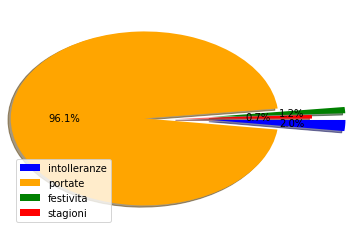

<Figure size 720x720 with 0 Axes>

In [140]:
#Grafico per rappresentare la precentuale dei record contenuti in ogni categoria
values = [count_intoll, count_portate, count_festivita, count_stagioni]
colors = ['blue', 'orange', 'green', 'red']
labels= ['intolleranze', 'portate', 'festivita', 'stagioni']
explode = (0.25, 0.25, 0.25, 0)
plt.pie(values, colors=colors,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.legend(labels,loc=3)
plt.show()
fig = plt.figure(figsize=[10, 10]) 
fig.savefig('count_tot.png')

In [141]:
sum_intoll= int(sum(intolleranze['Volume']))
sum_portate =int(sum(portate['Volume']))
sum_festivita= int(sum(festivita['Volume']))
sum_stagioni = int(sum(stagioni['Volume']))
sum_intoll
sum_portate
sum_festivita
tot= sum_stagioni + sum_intoll + sum_portate + sum_festivita
tot

4429627

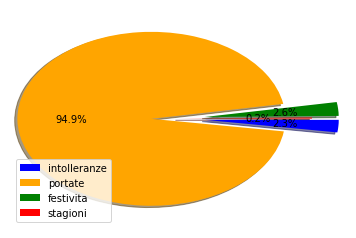

<Figure size 720x720 with 0 Axes>

In [142]:
#Grafico per rappresentare la precentuale dei volumi contenuti in ogni categoria
values = [sum_intoll, sum_portate, sum_festivita, sum_stagioni]
colors = ['blue', 'orange', 'green', 'red']
labels= ['intolleranze', 'portate', 'festivita', 'stagioni']
explode = (0.2, 0.2, 0.2, 0)
plt.pie(values, colors=colors,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.legend(labels,loc=3)
plt.show()
fig = plt.figure(figsize=[10, 10]) 
fig.savefig('sum_tot.png')

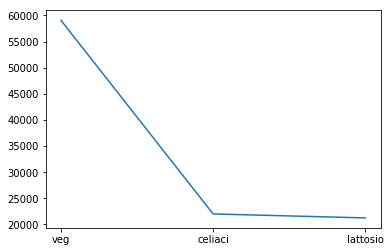

In [143]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#SOMMA
intolleranze=['veg','celiaci','lattosio']
volumi=[ sum(vegD['Volume']),sum(celiacifil['Volume']), sum(latticini['Volume'])]
plt.plot(intolleranze ,volumi)
plt.savefig('sumintolleranz.png')

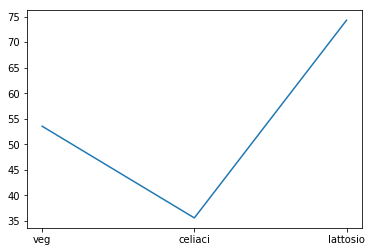

In [144]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#MEDIA
intolleranze=['veg','celiaci','lattosio']
volumi=[(vegD['Volume'].mean()), (celiacifil['Volume'].mean()), (latticini['Volume'].mean())]
plt.plot(intolleranze,volumi)
plt.savefig('mediaintolleranz.png')

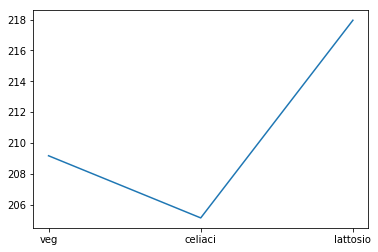

In [145]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#std
intolleranze=['veg','celiaci','lattosio']
volumi=[(vegD['Volume'].std()), (celiacifil['Volume'].std()), (latticini['Volume'].std())]
plt.plot(intolleranze,volumi)
plt.savefig('stdintolleranz.png')

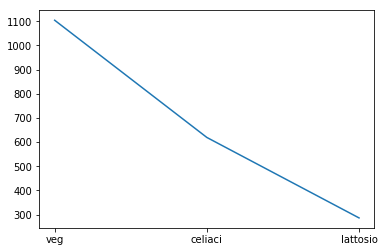

In [146]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#count
intolleranze=['veg','celiaci','lattosio']
volumi=[(vegD['Volume'].count()), (celiacifil['Volume'].count()), (latticini['Volume'].count())]
plt.plot(intolleranze,volumi)
plt.savefig('countintolleranz.png')

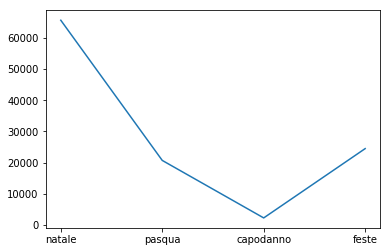

In [147]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#SOMMA
festivita=['natale','pasqua','capodanno','feste']
volumi=[ sum(natale['Volume']),sum(pasqua['Volume']), sum(capodanno['Volume']), sum(feste['Volume'])]
plt.plot(festivita ,volumi)
plt.savefig('sumfestivita.png')

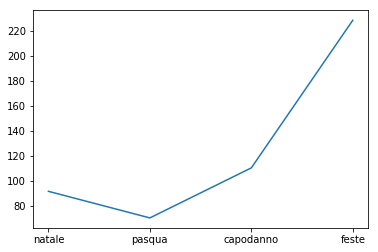

In [148]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#MEDIA
festivita=['natale','pasqua','capodanno','feste']
volumi=[(natale['Volume'].mean()), (pasqua['Volume'].mean()), (capodanno['Volume'].mean()),(feste['Volume'].mean())]
plt.plot(festivita,volumi)
plt.savefig('mediafestivita.png')

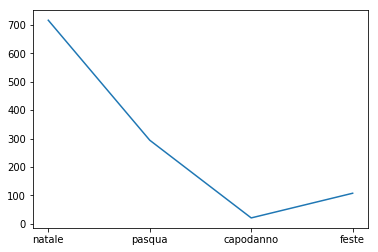

In [149]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#count
festivita=['natale','pasqua','capodanno','feste']
volumi=[(natale['Volume'].count()), (pasqua['Volume'].count()), (capodanno['Volume'].count()),(feste['Volume'].count())]
plt.plot(festivita,volumi)
plt.savefig('countfestivita.png')

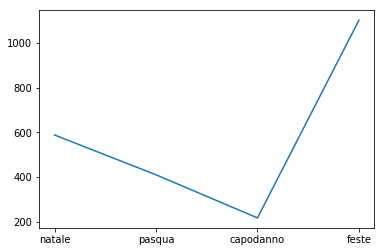

In [150]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#std
festivita=['natale','pasqua','capodanno','feste']
volumi=[(natale['Volume'].std()), (pasqua['Volume'].std()), (capodanno['Volume'].std()),(feste['Volume'].std())]
plt.plot(festivita,volumi)
plt.savefig('stdfestivita.png')

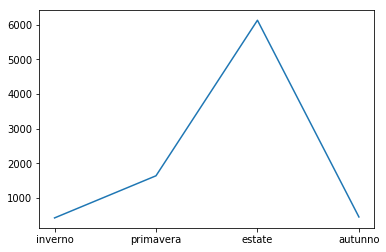

In [151]:
stagionalita=['inverno','primavera','estate','autunno']
volumi=[ sum(inverno['Volume']),sum(primavera['Volume']), sum(estate['Volume']), sum(autunno['Volume'])]
plt.plot(stagionalita ,volumi)
plt.savefig('sumstagionalita.png')

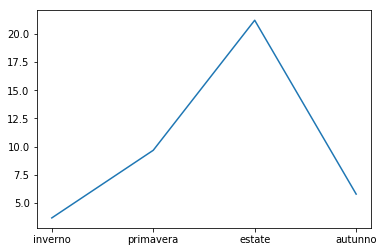

In [152]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#MEDIA
stagionalita=['inverno','primavera','estate','autunno']
volumi=[(inverno['Volume'].mean()), (primavera['Volume'].mean()), (estate['Volume'].mean()),(autunno['Volume'].mean())]
plt.plot(stagionalita,volumi)
plt.savefig('mediastagionalita.png')

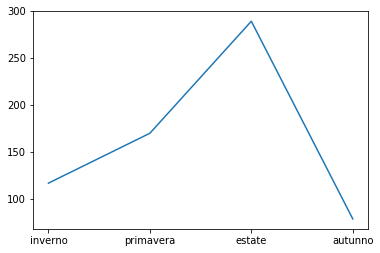

In [153]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#MEDIA
stagionalita=['inverno','primavera','estate','autunno']
volumi=[(inverno['Volume'].count()), (primavera['Volume'].count()), (estate['Volume'].count()),(autunno['Volume'].count())]
plt.plot(stagionalita,volumi)
plt.savefig('countstagionalita.png')

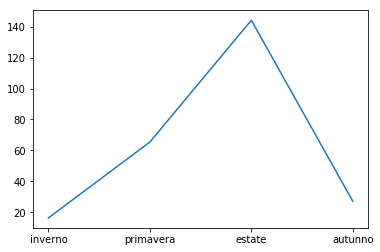

In [154]:
#GRAFICO PER PROIETTARE PER OGNI CATEGORIA LA DISTRIBUZIONE DELLE SOTTOCATEGORIE
#std
stagionalita=['inverno','primavera','estate','autunno']
volumi=[(inverno['Volume'].std()), (primavera['Volume'].std()), (estate['Volume'].std()),(autunno['Volume'].std())]
plt.plot(stagionalita,volumi)
plt.savefig('stdstagionalita.png')

In [183]:
#totale categorie
tot_categorie = [celiacifil, latticini, vegD, primop, secondiD, contorniD, antifilter, dolciD, inverno, primavera, estate, autunno, capodanno, natale, feste, pasqua]
result = pd.concat(tot_categorie)
result.to_csv('tot_categorie.csv')
categorie =pd.read_csv('tot_categorie.csv')
categorie.columns= [' ','Keyword','Volume']
len(categorie)


114120

In [185]:
c=categorie.drop_duplicates('Keyword')#eliminazione record duplicati nel csv finale
len(c)
c.groupby(['Volume']).count()


,,Keyword
Volume,,
0.000000,67360,67360
1.000000,1,1
1.002368,1,1
1.007008,1,1
1.116060,1,1
1.234689,1,1
1.265066,1,1
1.269977,1,1
1.286096,1,1
